#1-Commencez par télécharger le fichier Excel contenant les données automobiles et afficher data



In [420]:
import pandas as pd
import numpy as np
data=pd.read_excel('/données automobiles.xlsx')
data

,acceleration,engine.displacement,Color,horesepower,weight,cylinders
0,16.0,302.0,Red,140,4638,Eight
1,16.0,79.0,Red,67,2000,Four
2,16.6,98.0,Red,68,2135,Four
3,16.9,116.0,Red,81,2220,Four
4,15.0,120.0,Red,97,2489,Four
...,...,...,...,...,...,...
225,16.0,135.0,Red,84,2525,Four
226,16.5,122.0,Red,80,2451,Four
227,16.4,86.0,Red,64,1875,Four
228,13.5,70.0,Red,97,2330,Three


#2-Supprimez la colonne "color" du DataFrame

In [421]:
data = data.drop(columns='Color')



In [422]:
data


,acceleration,engine.displacement,horesepower,weight,cylinders
0,16.0,302.0,140,4638,Eight
1,16.0,79.0,67,2000,Four
2,16.6,98.0,68,2135,Four
3,16.9,116.0,81,2220,Four
4,15.0,120.0,97,2489,Four
...,...,...,...,...,...
225,16.0,135.0,84,2525,Four
226,16.5,122.0,80,2451,Four
227,16.4,86.0,64,1875,Four
228,13.5,70.0,97,2330,Three


#3-afficher x et y

In [423]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Sélectionner les colonnes pour x et y
x = data.iloc[:, 1:]  # Colonnes à partir de l'index 1
y = data.iloc[:, 0]  # Première colonne

In [424]:
x

,engine.displacement,horesepower,weight,cylinders
0,302.0,140,4638,Eight
1,79.0,67,2000,Four
2,98.0,68,2135,Four
3,116.0,81,2220,Four
4,120.0,97,2489,Four
...,...,...,...,...
225,135.0,84,2525,Four
226,122.0,80,2451,Four
227,86.0,64,1875,Four
228,70.0,97,2330,Three


In [425]:
y

0      16.0
1      16.0
2      16.6
3      16.9
4      15.0
       ... 
225    16.0
226    16.5
227    16.4
228    13.5
229    15.3
Name: acceleration, Length: 230, dtype: float64

#4-crée x2 et y2 sous forme tableau de tableau et représenter la colonne "cylinders" sous forme de variables binaires en utilisant les classes OneHotEncoder et ColumnTransformer

In [426]:

# on dois dabord présenter x en fonction de tableau de tableau
x2=x.values
y2=y.values

from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('cylinders', OneHotEncoder(), [3])], remainder='passthrough')
x2 = ct.fit_transform(x2)
x2

array([[1.0, 0.0, 0.0, ..., 302.0, 140, 4638],
       [0.0, 0.0, 1.0, ..., 79.0, 67, 2000],
       [0.0, 0.0, 1.0, ..., 98.0, 68, 2135],
       ...,
       [0.0, 0.0, 1.0, ..., 86.0, 64, 1875],
       [0.0, 0.0, 0.0, ..., 70.0, 97, 2330],
       [0.0, 0.0, 1.0, ..., 89.0, 62, 1845]], dtype=object)

#5-Divisez les données en ensembles d'entraînement train et de test


In [427]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)


#6-afficher le score du modèle de régression linéaire multiple

In [428]:
from sklearn.linear_model import LinearRegression

# Création du modèle
model = LinearRegression()

# Entraînement
model.fit(x2_train, y2_train)

# Affichage du score
score = model.score(x2_test, y2_test)
print("Score du modèle de régression linéaire multiple :", score)


Score du modèle de régression linéaire multiple : 0.7217104940835222


#7-afficher la résultat de preduction pour 
cylinders:Four | engine.displacement:200 | **Color**:Red	| horesepower: 80 | weight:2638



In [429]:
V_test=[[0.0, 0.0, 1.0, 0.0, 0.0, 200, 80, 2638]]
y_res=model.predict(V_test)
print("la résultat de prédection des x2 est :",y_res)

la résultat de prédection des x2 est : [16.35905057]


In [430]:
x

,engine.displacement,horesepower,weight,cylinders
0,302.0,140,4638,Eight
1,79.0,67,2000,Four
2,98.0,68,2135,Four
3,116.0,81,2220,Four
4,120.0,97,2489,Four
...,...,...,...,...
225,135.0,84,2525,Four
226,122.0,80,2451,Four
227,86.0,64,1875,Four
228,70.0,97,2330,Three


#8-Utilisez la méthode des moindres carrés polynomiaux en fonction de la variable "engine.displacement" avec degrée 9

In [431]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Divisez les données en ensembles d'entraînement train et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

poly = PolynomialFeatures(degree=9)
p_engine_train = poly.fit_transform(x_train[["engine.displacement"]])
p_engine_test = poly.fit_transform(x_test[["engine.displacement"]])

# create the model
predic = LinearRegression().fit(p_engine_train, y_train)
ypred_engine = predic.predict(p_engine_test)

score_engine = r2_score(y_test, ypred_engine)
print("The score is", score_engine)


The score is 0.2913644253869099



#9-Affichez le nuage de points des données avec la variable "engine.displacement" et tracez également la courbe du polynôme ajusté.


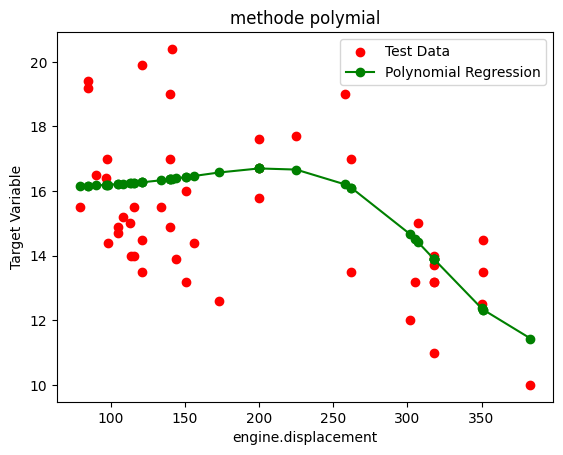

In [432]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already performed the necessary data preparation steps

# Plot scatter plot of the data
plt.scatter(x_test["engine.displacement"], y_test, color='red', label='Test Data')

# Affichage de la régression polynomiale
new_x_poly, new_y_poly = zip(*sorted(zip(x_test["engine.displacement"], ypred_engine)))
plt.plot(new_x_poly, new_y_poly, "o-", color="g", label="Polynomial Regression")


plt.xlabel('engine.displacement')
plt.ylabel('Target Variable')
plt.title('methode polymial')
plt.legend()

plt.show()


#10-Utilisez une boucle pour appliquer la méthode des moindres carrés polynomiaux sur le test set (x_test) en faisant varier le degré du polynôme de 0 à 20 pour afficher le meilleur score et le meilleurs degrée

In [433]:


best_score = 0
best_degree = 0

for degree in range(20):
    poly = PolynomialFeatures(degree=degree)
    p_engine_train = poly.fit_transform(x_train[["engine.displacement"]])
    p_engine_test = poly.fit_transform(x_test[["engine.displacement"]])

    # create the model
    predic = LinearRegression().fit(p_engine_train, y_train)
    ypred_engine = predic.predict(p_engine_test)

    score_engine5 = r2_score(y_test, ypred_engine)
    
    # Check if the current score is better than the previous best score
    if score_engine5 > best_score:
        best_score = score_engine5
        best_degree = degree

print("le meilleur score est ", best_score)
print("la meilleur degrée est", best_degree)


le meilleur score est  0.3521654384179097
la meilleur degrée est 6


#11-A quoi recempble la méthode des moindres carrés polynomiaux de la colone engine.displacement si on fixe le degrée à 1

In [434]:
# elle resemble a la méthode de régression simple de la colone engine.displacement avec le modèle ax+b

#Question challenge 1
# afficher le score de regression liniaire pour les 3 premiers colone en utilisant la boucle for

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sélectionnez les trois premières colonnes de x
selected_columns = x.iloc[:, :3]

# Créez un dictionnaire pour stocker les R2 scores
r2_scores = {}

# Parcourez chaque colonne dans les colonnes sélectionnées
for column in selected_columns.columns:
    # Créez un modèle de régression linéaire
    model = LinearRegression()
    
    # Remodelez la colonne en un tableau 2D comme requis par scikit-learn
    X = selected_columns[column].values.reshape(-1, 1)
    
    # Ajustez le modèle sur la colonne et la variable cible
    model.fit(X, y)
    
    # Prédisez la variable cible en utilisant le modèle ajusté
    y_pred = model.predict(X)
    
    # Calculez le R2 score pour la colonne
    score10 = r2_score(y, y_pred)
    
    # Stockez le R2 score dans le dictionnaire
    r2_scores[column] = score10

# Affichez les R2 scores
for column, score in r2_scores.items():
    print("Colonne :", column)
    print("R2 Score :", score10)
    print()


Colonne : engine.displacement
R2 Score : 0.1691131457734465

Colonne : horesepower
R2 Score : 0.1691131457734465

Colonne : weight
R2 Score : 0.1691131457734465



#Question challenge 2
# afficher la visualisation des 3 premier colone en utilisant la regression liniaire simple et la boucle for sur une seule figure à 3 colones
NB utiliser scores.append pour pouvoir afficher les scores dans l'exercice prochain 

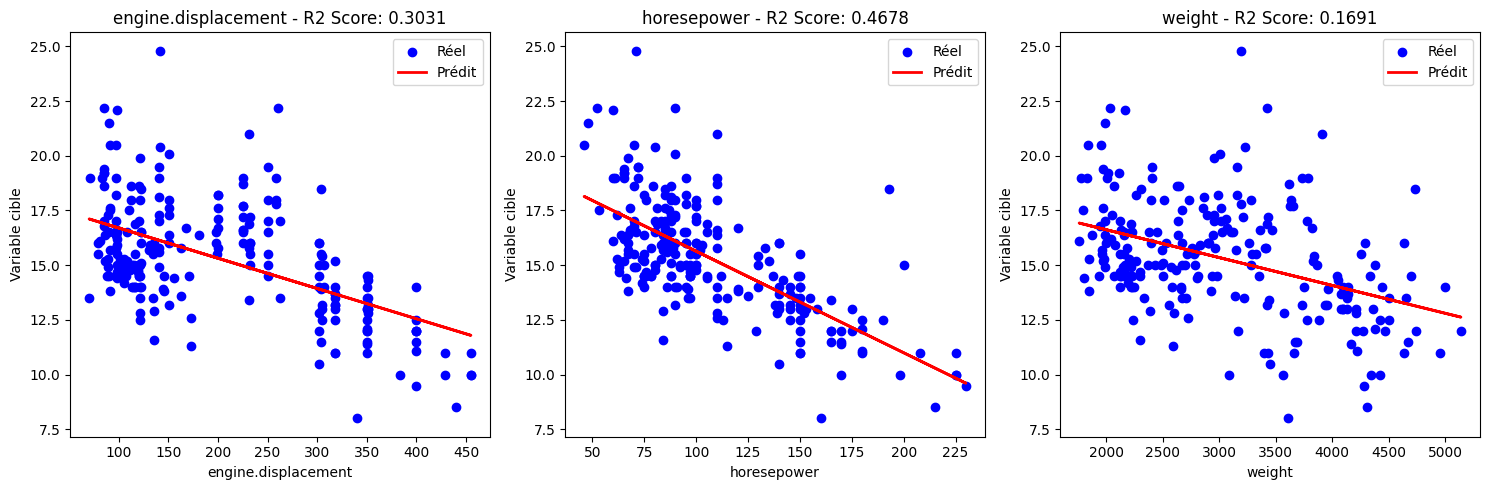

In [436]:
import matplotlib.pyplot as plt

# Sélectionnez les trois premières colonnes de x
selected_columns = x.iloc[:, :3]

# Créez une figure avec trois sous-graphiques pour les régressions linéaires
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Liste pour stocker les scores
scores = []

# Parcourez chaque colonne dans les colonnes sélectionnées
for i, column in enumerate(selected_columns.columns):
    # Créez un modèle de régression linéaire
    model = LinearRegression()
    
    # Remodelez la colonne en un tableau 2D comme requis par scikit-learn
    X = selected_columns[column].values.reshape(-1, 1)
    
    # Ajustez le modèle sur la colonne et la variable cible
    model.fit(X, y)
    
    # Prédisez la variable cible en utilisant le modèle ajusté
    y_pred = model.predict(X)
    
    # Calculez le score R2 pour la colonne
    score10 = r2_score(y, y_pred)
    scores.append(score10)
    
    # Tracez les points de données et la ligne de régression dans le sous-graphique
    ax = axes[i]
    ax.scatter(X, y, color='blue', label='Réel')
    ax.plot(X, y_pred, color='red', linewidth=2, label='Prédit')
    ax.set_xlabel(column)
    ax.set_ylabel('Variable cible')
    ax.set_title(f'{column} - R2 Score: {score10:.4f}')
    ax.legend()

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()
# Affichez la figure des régressions linéaires
plt.show()


#Créer le graphe score

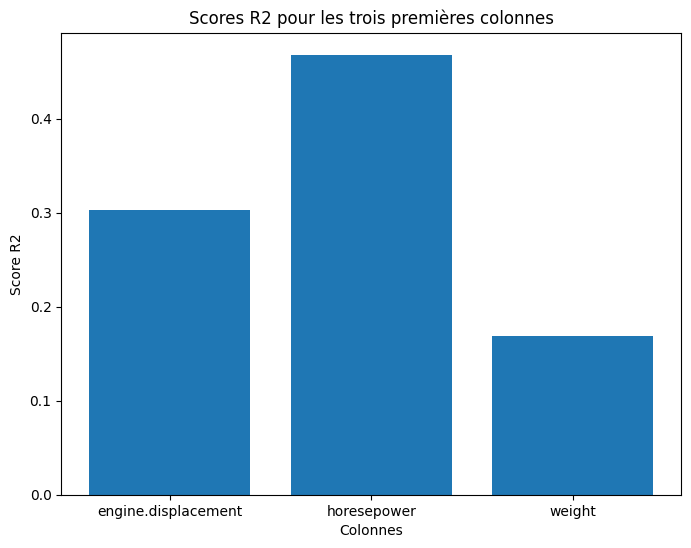

In [437]:
# Créez un graphique de score
plt.figure(figsize=(8, 6))
plt.bar(selected_columns.columns, scores)
plt.xlabel('Colonnes')
plt.ylabel('Score R2')
plt.title('Scores R2 pour les trois premières colonnes')
plt.show()